<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch workflow
Covered in this notebook:
* Get data ready
* Build or pick a pretrained model
* fit the model
* making predictions(inference) and evaluating
* save and reload

In [1]:
import torch
from torch import nn # contains all building blocks of nn in torch
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Data (preparing and loading)

-> Get data into numerical representation

-> Build a model to learn model from that numerical representation.

-> Here, lets make a linearly dependant output feature in relation to input feature

In [2]:
w = 0.3
b = 0.5

In [18]:
X = torch.arange(1, 15, 0.25).unsqueeze(dim=1)
Y = w*X + b # actual output

In [19]:
X, Y, X.shape, Y.shape

(tensor([[ 1.0000],
         [ 1.2500],
         [ 1.5000],
         [ 1.7500],
         [ 2.0000],
         [ 2.2500],
         [ 2.5000],
         [ 2.7500],
         [ 3.0000],
         [ 3.2500],
         [ 3.5000],
         [ 3.7500],
         [ 4.0000],
         [ 4.2500],
         [ 4.5000],
         [ 4.7500],
         [ 5.0000],
         [ 5.2500],
         [ 5.5000],
         [ 5.7500],
         [ 6.0000],
         [ 6.2500],
         [ 6.5000],
         [ 6.7500],
         [ 7.0000],
         [ 7.2500],
         [ 7.5000],
         [ 7.7500],
         [ 8.0000],
         [ 8.2500],
         [ 8.5000],
         [ 8.7500],
         [ 9.0000],
         [ 9.2500],
         [ 9.5000],
         [ 9.7500],
         [10.0000],
         [10.2500],
         [10.5000],
         [10.7500],
         [11.0000],
         [11.2500],
         [11.5000],
         [11.7500],
         [12.0000],
         [12.2500],
         [12.5000],
         [12.7500],
         [13.0000],
         [13.2500],


#### 2. Splitting data into train, validation and test data

In [23]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([44, 1]),
 torch.Size([12, 1]),
 torch.Size([44, 1]),
 torch.Size([12, 1]))

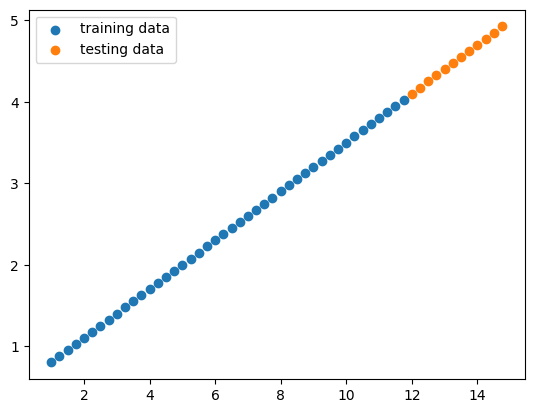

In [26]:
plt.scatter(X_train, Y_train, label='training data');
plt.scatter(X_test, Y_test, label='testing data');
plt.legend()

In [27]:
def plot_data(x_train=X_train, y_train=Y_train, x_test=X_test, y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, label='training data');
    plt.scatter(X_test, Y_test, label='testing data');
    if predictions is not None:
      plt.scatter(X_test, predictions, label = "predictions");
    plt.legend()

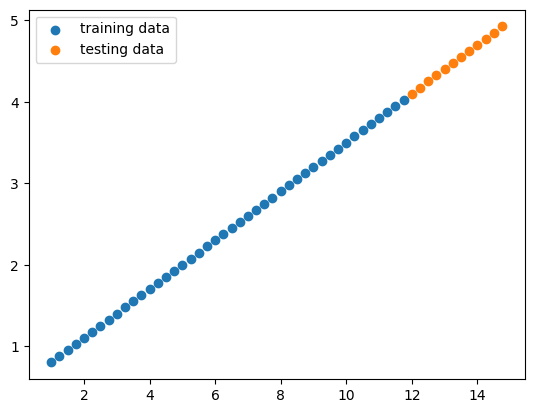

In [28]:
plot_data()

#### 3. Building the model

In [31]:
from torch import nn
class LinearModel(nn.Module): # nn.Module contains all building blocks for NN
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # a kind of tensor that is considered as module parameter
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor: # X : input data, forward propagation
    return self.weights*x + self.bias